In [6]:
if __name__ == '__main__':
    import sys
    import os
    from pathlib import Path
    curr_file_path = Path(os.path.abspath(''))
    sys.path.append(str(curr_file_path.parent))

import numpy as np
import glob2 as glob
import matplotlib as mpl
import matplotlib.pyplot as plt
import torch
from agents.networks.gru_rnn import GRU_RNN

In [7]:
HIDDEN_SIZE = 32
INPUT_SIZE = 1
DEVICE = 'cuda'
LEARNING_RATE = 1e-3
VAR_NOISE = 1e-4

In [35]:
network_untrained = GRU_RNN(
    input_size=INPUT_SIZE,
    hidden_size=HIDDEN_SIZE,
    device=DEVICE,
    var_noise=VAR_NOISE,
)

load_path = '../../results/line_attr_supervised/test_2024-11-28_15_48_56_780557_var_noise_0.0001_activity_weight_1e-07/rnn_weights/000099.h5'
network_untrained.load_state_dict(torch.load(load_path, weights_only=True))

<All keys matched successfully>

In [36]:
w_hh_untrained = network_untrained.rnn.weight_hh.detach().cpu().numpy()

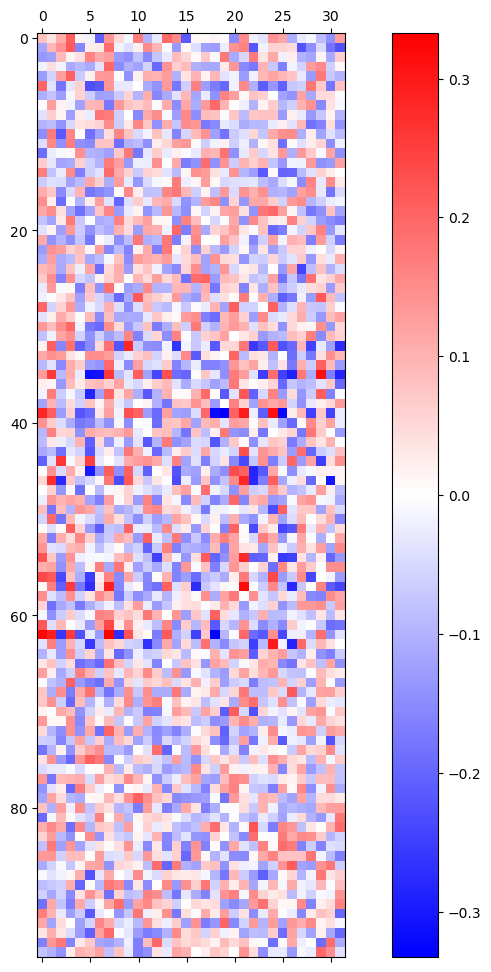

In [37]:
scale = 3
fig, axs = plt.subplots(1, 1, figsize=(4 * scale, 4 * scale))

m = np.abs(w_hh_untrained).max()
cbar = axs.matshow(w_hh_untrained, vmin=-m, vmax=m, cmap='bwr')
plt.colorbar(cbar)

In [26]:
network_trained = GRU_RNN(
    input_size=INPUT_SIZE,
    hidden_size=HIDDEN_SIZE,
    device=DEVICE,
    var_noise=VAR_NOISE,
)

load_path = '../../results/line_attr_supervised/test_2024-11-28_15_48_56_780557_var_noise_0.0001_activity_weight_1e-07/rnn_weights/009999.h5'
network_trained.load_state_dict(torch.load(load_path, weights_only=True))

<All keys matched successfully>

In [27]:
w_ih_trained = network.rnn.weight_ih.detach().cpu().numpy()

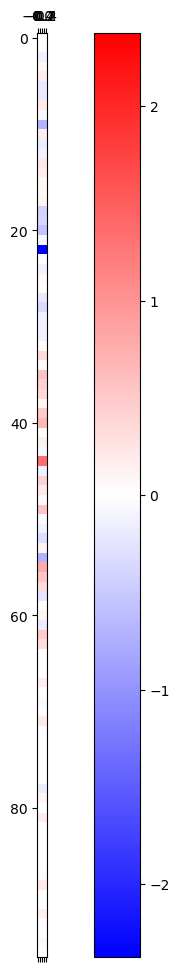

In [28]:
scale = 3
fig, axs = plt.subplots(1, 1, figsize=(4 * scale, 4 * scale))

m = np.abs(w_ih_trained).max()
cbar = axs.matshow(w_ih_trained, vmin=-m, vmax=m, cmap='bwr')
plt.colorbar(cbar)

In [39]:
w_hh_trained = network_trained.rnn.weight_hh.detach().cpu().numpy()

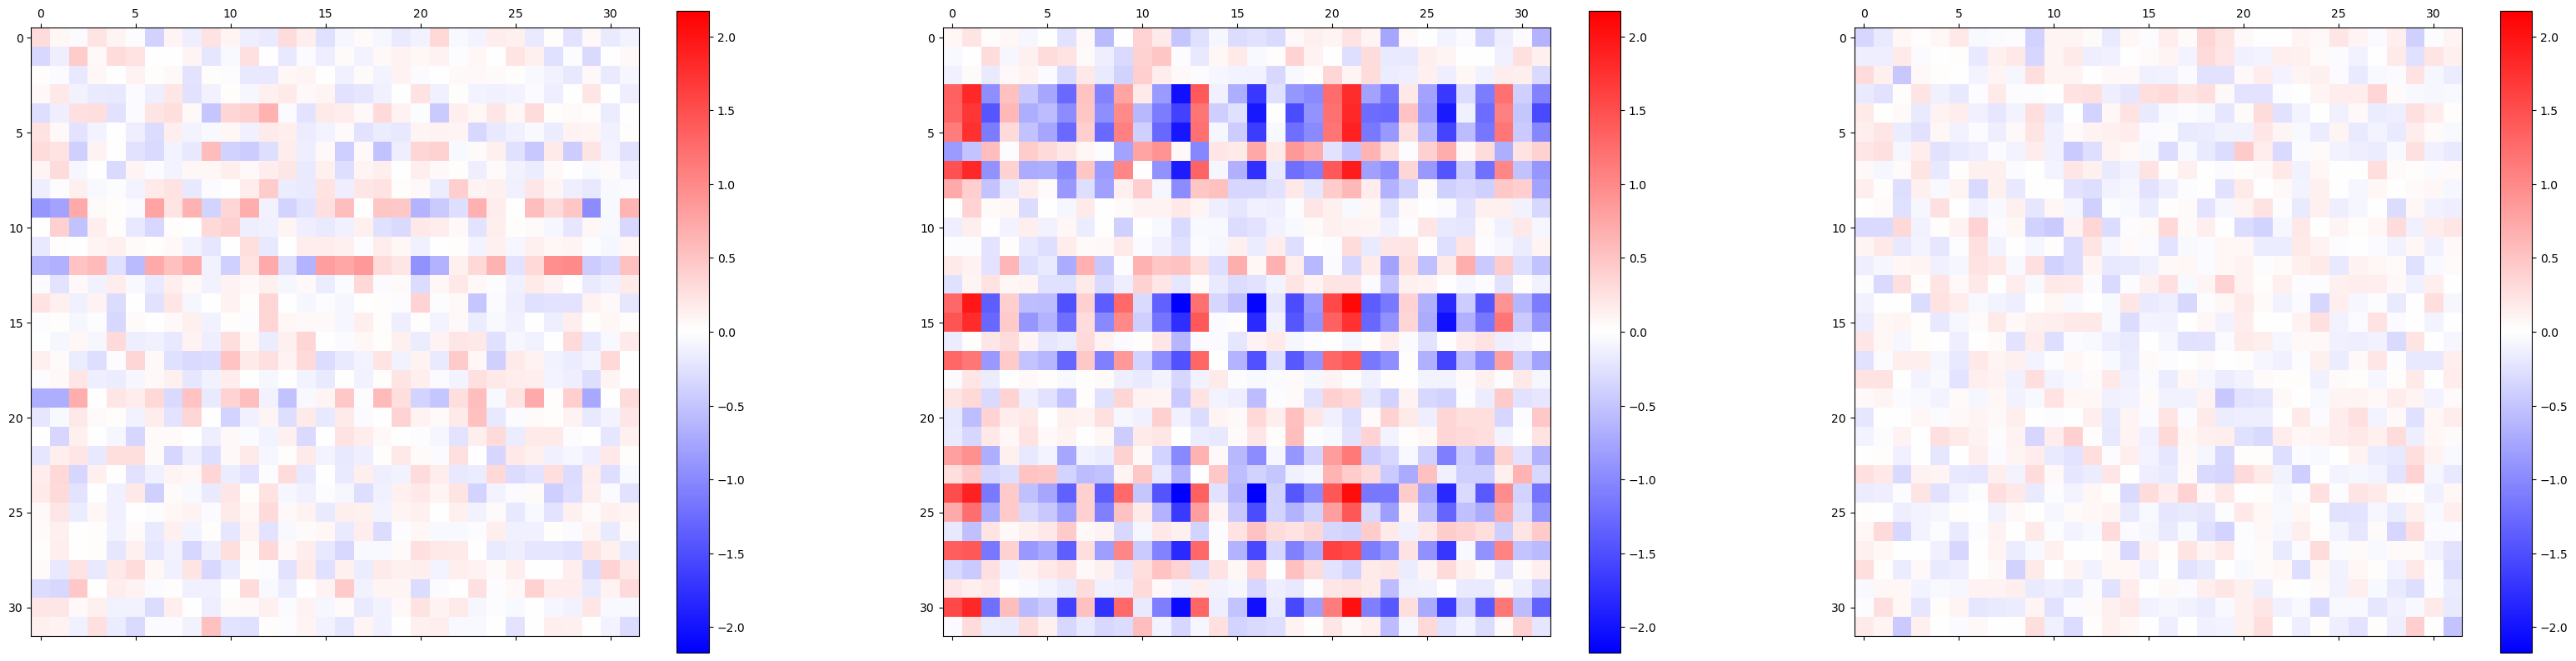

In [67]:
scale = 10
fig, axs = plt.subplots(1, 3, figsize=(4 * scale, 1 * scale))

m = np.abs(w_hh_trained).max()
for k in range(3):
    cbar = axs[k].matshow(w_hh_trained[k * 32:(k+1) * 32], vmin=-m, vmax=m, cmap='bwr')
    plt.colorbar(cbar)

In [52]:
def load_hidden_activity(data_path, averaging_size=1):
    file_names = glob.glob(data_path)
    data = []
    for file_name in file_names:
        print(file_name)
        data_for_file = np.load(file_name)
        print(data_for_file.shape)
        data.append(data_for_file)
    data = np.concatenate(data, axis=0)
    if averaging_size == 1:
        return data
    reduced_data = np.empty((data.shape[0], int(data.shape[1] / averaging_size)))
    for k in range(0, int(data.shape[1] / averaging_size) * averaging_size, averaging_size):
        reduced_data[:, int(k / averaging_size)] = data[:, k:k + averaging_size].mean(axis=1)
    return reduced_data

In [53]:
data = load_hidden_activity(
    '../../results/line_attr_supervised/actual_line_attr_test_2024-11-29_09_40_15_354744_var_noise_0.0001_activity_weight_1e-07/hidden_states/*.npy'
)

../../results/line_attr_supervised/actual_line_attr_test_2024-11-29_09_40_15_354744_var_noise_0.0001_activity_weight_1e-07/hidden_states\000000.npy
(100, 32, 1000)
../../results/line_attr_supervised/actual_line_attr_test_2024-11-29_09_40_15_354744_var_noise_0.0001_activity_weight_1e-07/hidden_states\000001.npy
(100, 32, 1000)
../../results/line_attr_supervised/actual_line_attr_test_2024-11-29_09_40_15_354744_var_noise_0.0001_activity_weight_1e-07/hidden_states\000002.npy
(100, 32, 1000)
../../results/line_attr_supervised/actual_line_attr_test_2024-11-29_09_40_15_354744_var_noise_0.0001_activity_weight_1e-07/hidden_states\000003.npy
(100, 32, 1000)
../../results/line_attr_supervised/actual_line_attr_test_2024-11-29_09_40_15_354744_var_noise_0.0001_activity_weight_1e-07/hidden_states\000004.npy
(100, 32, 1000)


In [54]:
print(data.shape)

(500, 32, 1000)


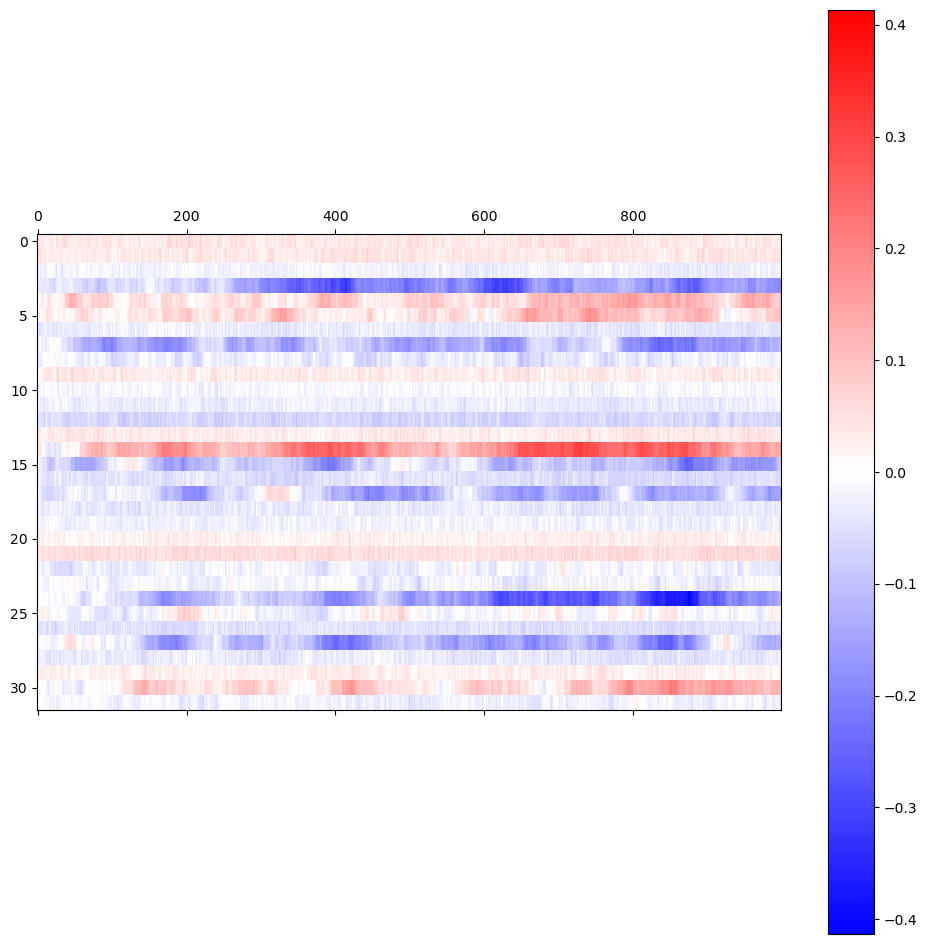

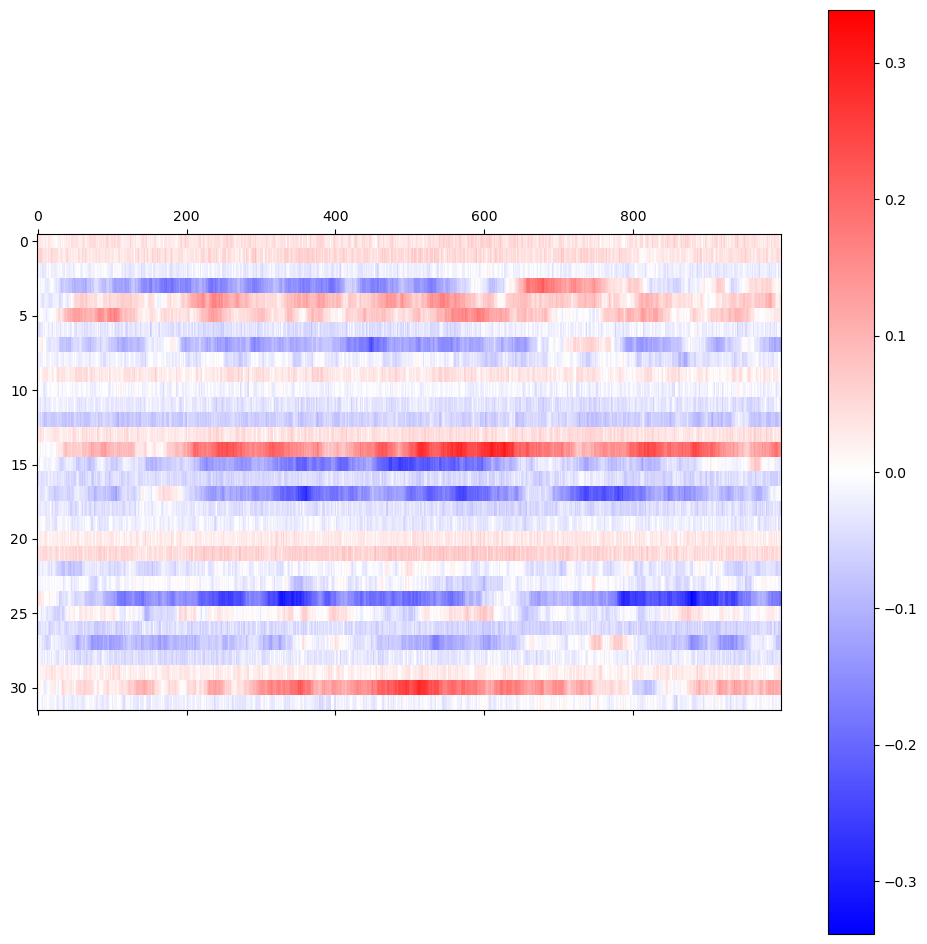

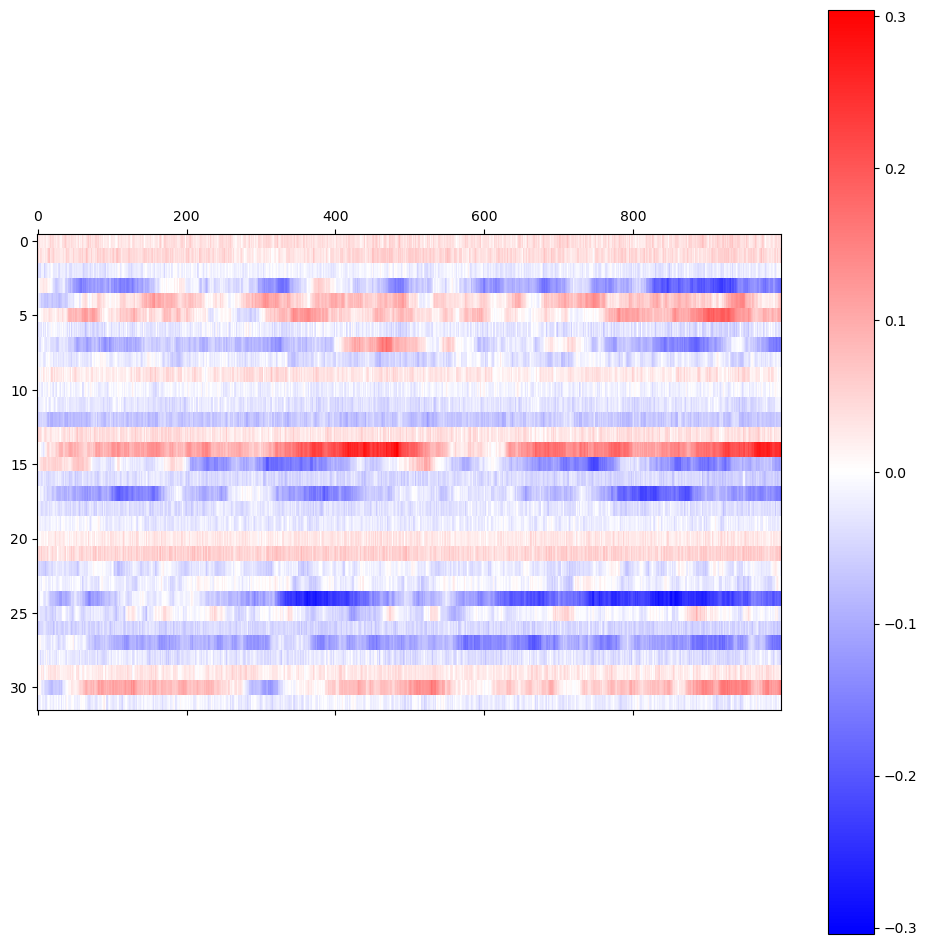

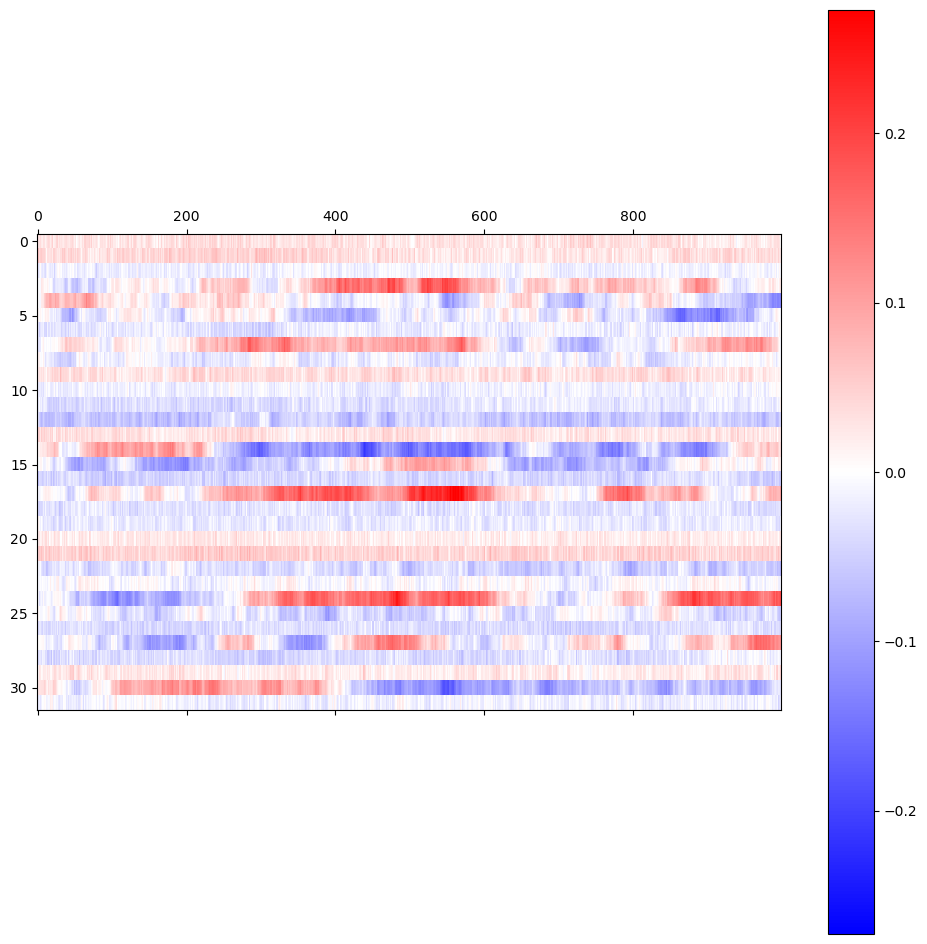

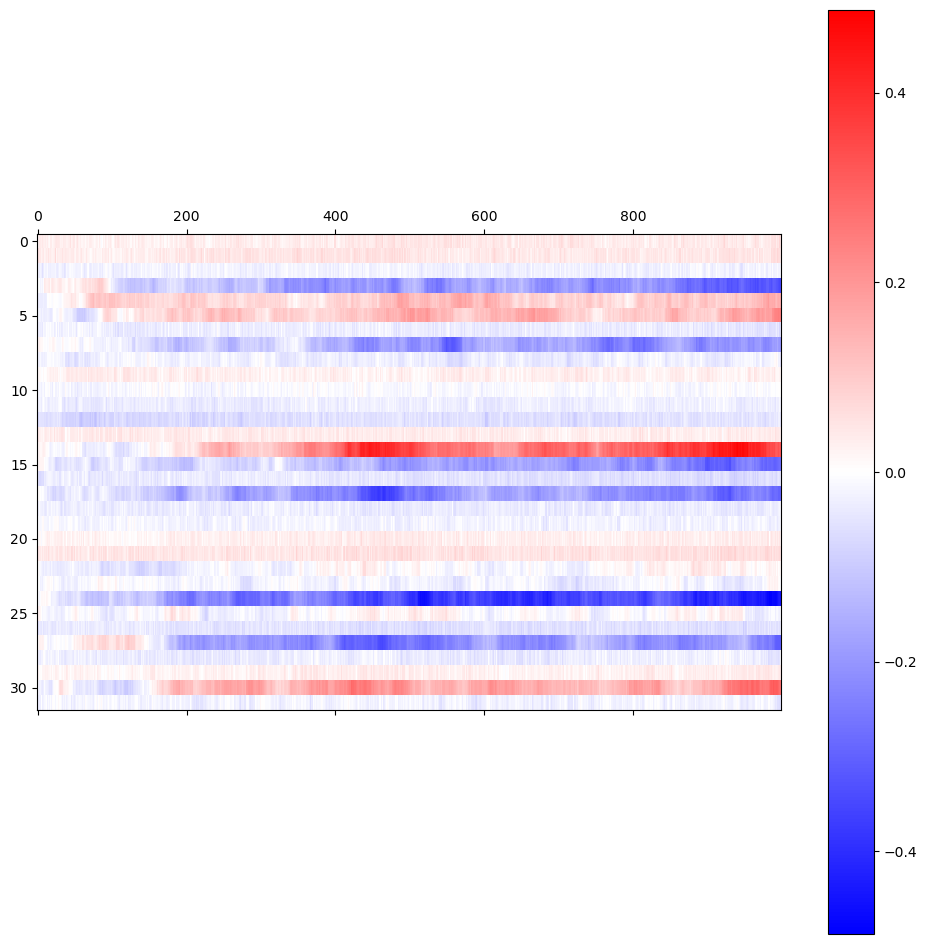

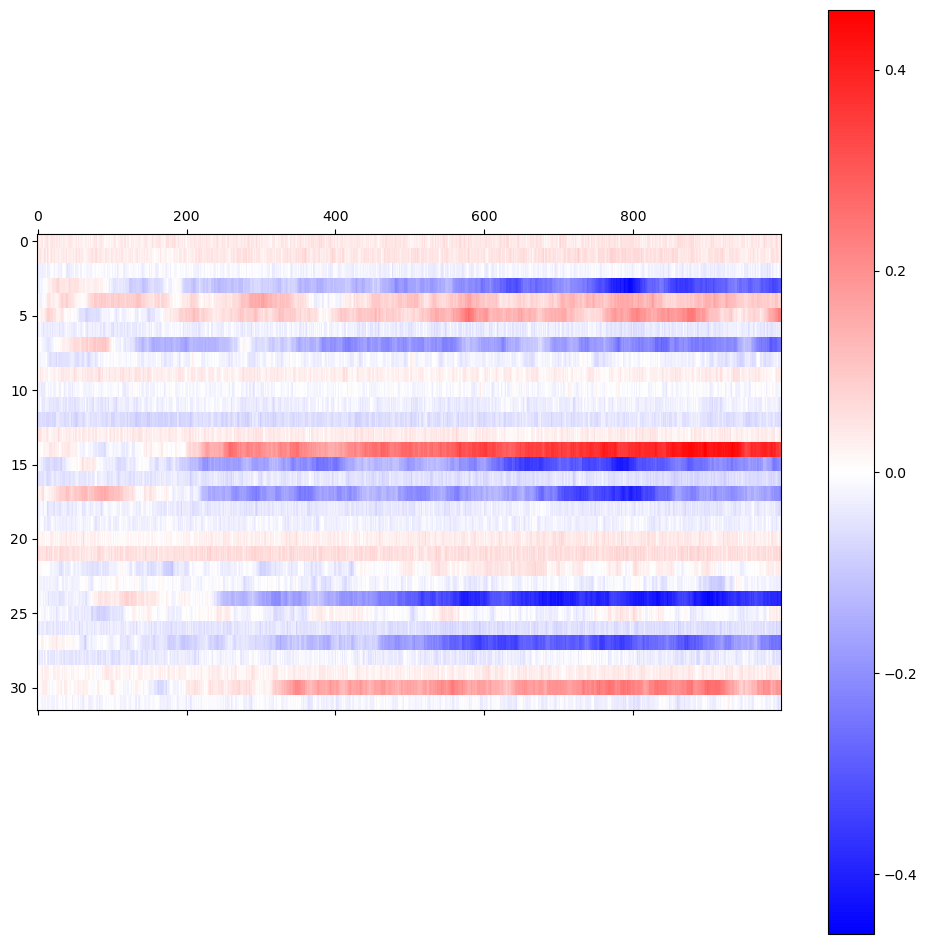

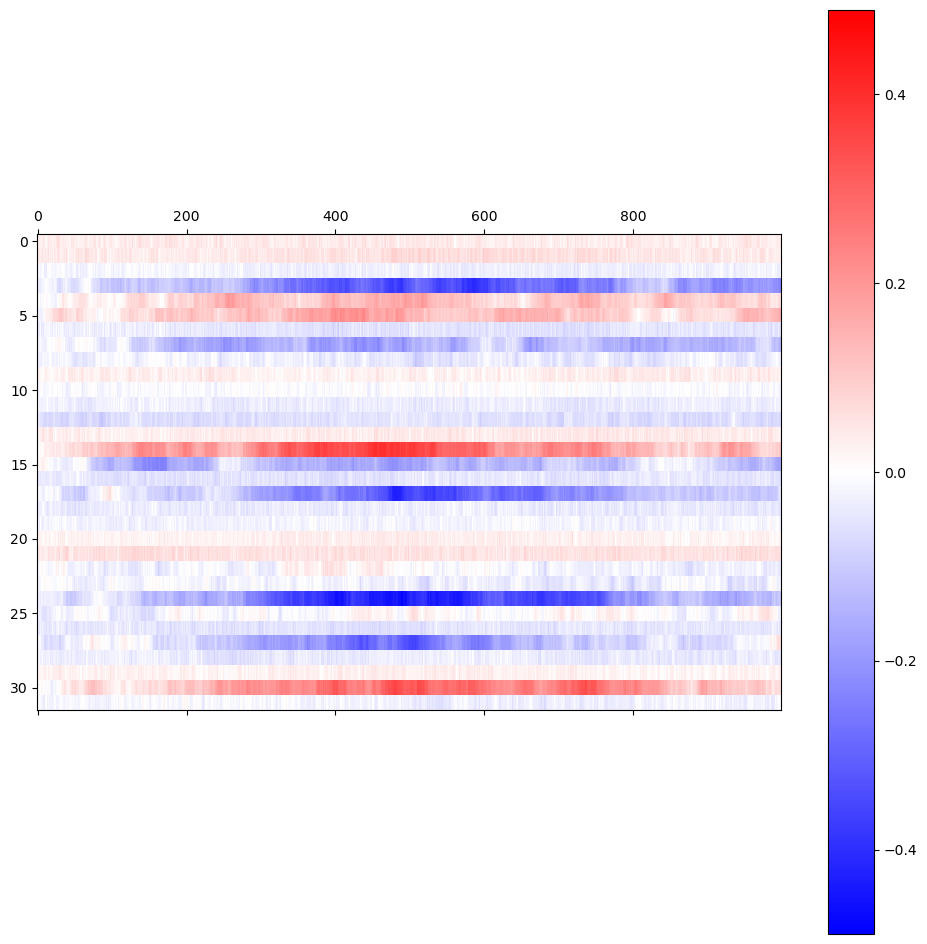

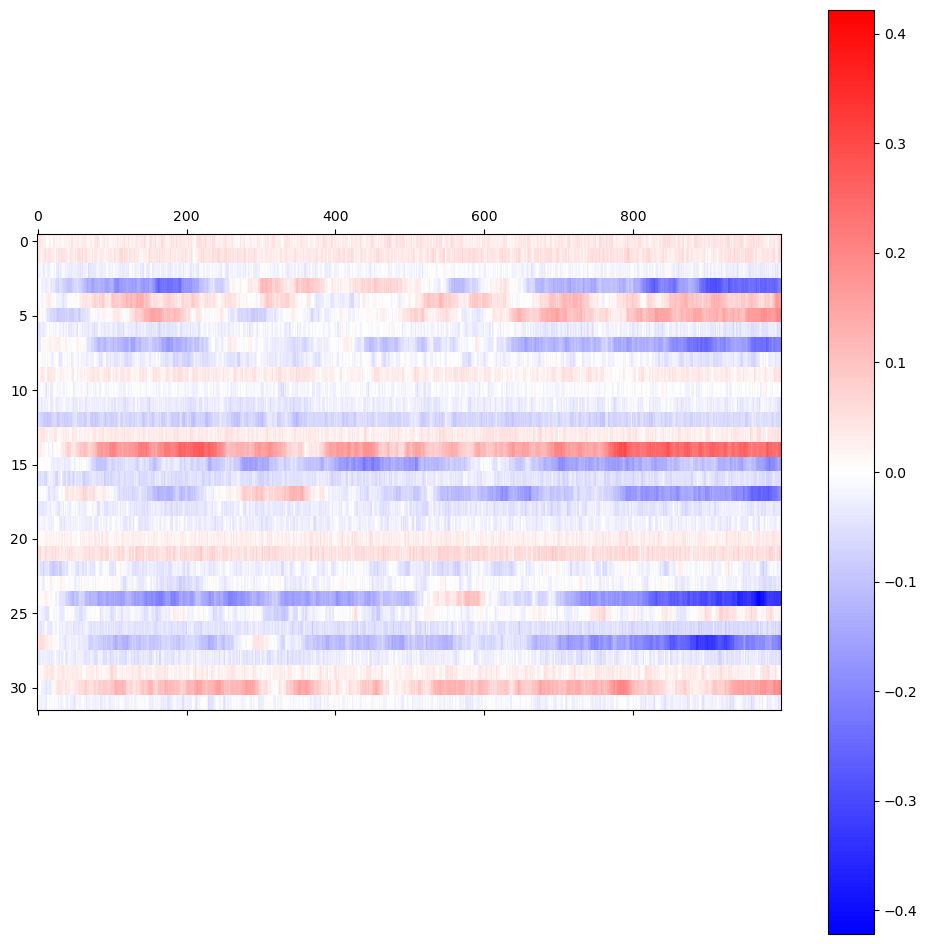

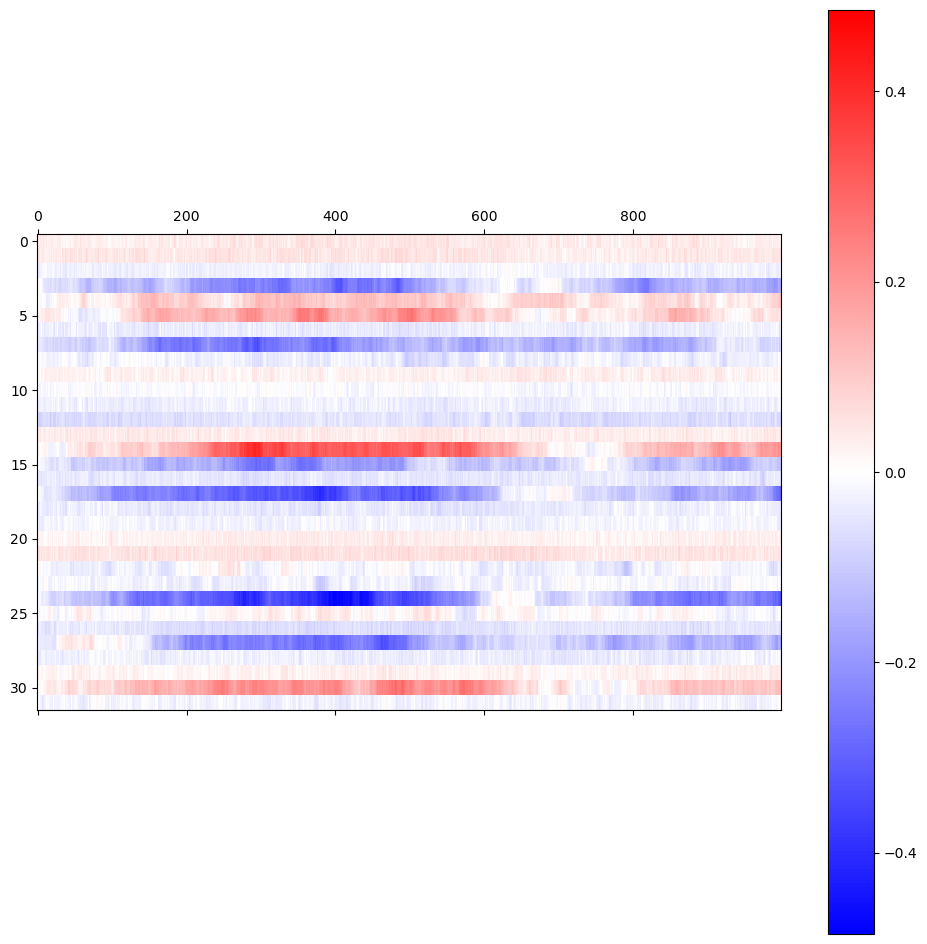

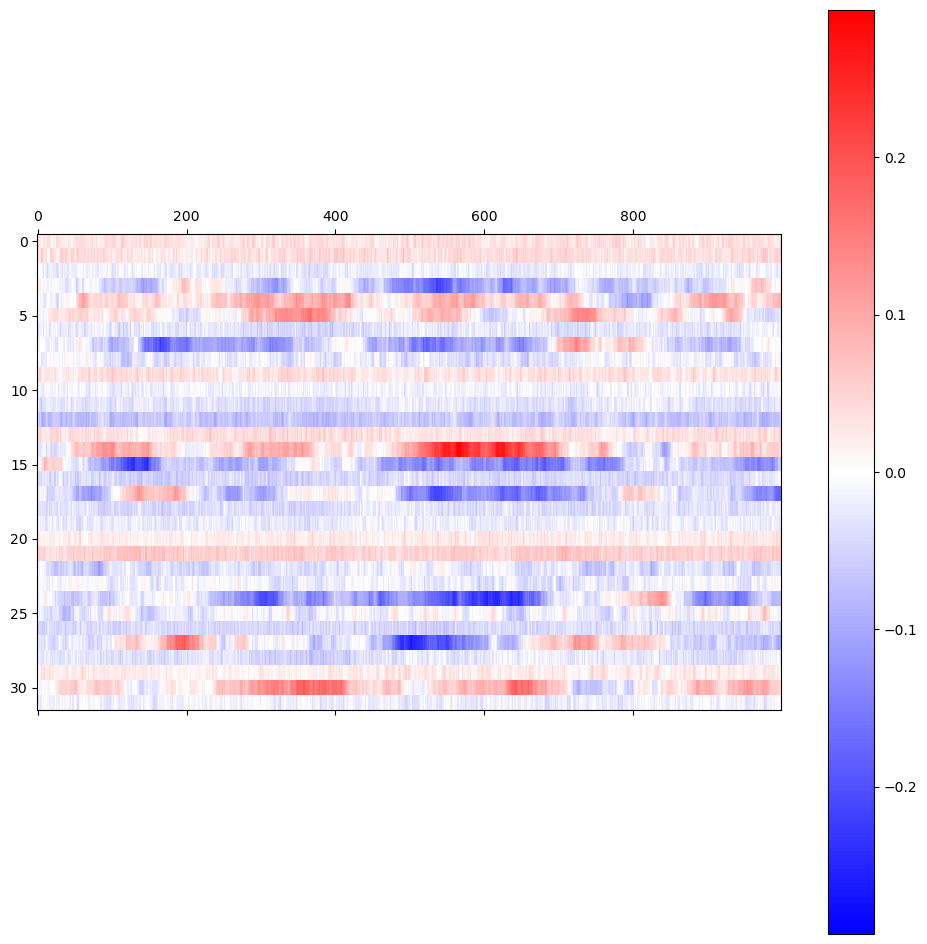

In [68]:
for k in range(10):
    hidden_activity = data[k, ...]
    
    scale = 3
    fig, axs = plt.subplots(1, 1, figsize=(4 * scale, 4 * scale))
    
    m = np.abs(hidden_activity).max()
    cbar = axs.matshow(hidden_activity, vmin=-m, vmax=m, cmap='bwr', aspect=20)
    plt.colorbar(cbar)

In [69]:
def load_numpy(data_path, averaging_size=1):
    file_names = glob.glob(data_path)
    data = []
    for file_name in file_names:
        print(file_name)
        data_for_file = np.load(file_name)
        print(data_for_file.shape)
        data.append(data_for_file)
    data = np.concatenate(data, axis=0)
    if averaging_size == 1:
        return data
    reduced_data = np.empty((data.shape[0], int(data.shape[1] / averaging_size)))
    for k in range(0, int(data.shape[1] / averaging_size) * averaging_size, averaging_size):
        reduced_data[:, int(k / averaging_size)] = data[:, k:k + averaging_size].mean(axis=1)
    return reduced_data

In [70]:
output_data = load_hidden_activity(
    '../../results/line_attr_supervised/actual_line_attr_test_2024-11-29_09_40_15_354744_var_noise_0.0001_activity_weight_1e-07/outputs/*.npy'
)

../../results/line_attr_supervised/actual_line_attr_test_2024-11-29_09_40_15_354744_var_noise_0.0001_activity_weight_1e-07/outputs\000000.npy
(2, 100)
../../results/line_attr_supervised/actual_line_attr_test_2024-11-29_09_40_15_354744_var_noise_0.0001_activity_weight_1e-07/outputs\000001.npy
(2, 100)
../../results/line_attr_supervised/actual_line_attr_test_2024-11-29_09_40_15_354744_var_noise_0.0001_activity_weight_1e-07/outputs\000002.npy
(2, 100)
../../results/line_attr_supervised/actual_line_attr_test_2024-11-29_09_40_15_354744_var_noise_0.0001_activity_weight_1e-07/outputs\000003.npy
(2, 100)
../../results/line_attr_supervised/actual_line_attr_test_2024-11-29_09_40_15_354744_var_noise_0.0001_activity_weight_1e-07/outputs\000004.npy
(2, 100)


In [71]:
print(output_data.shape)

(10, 100)


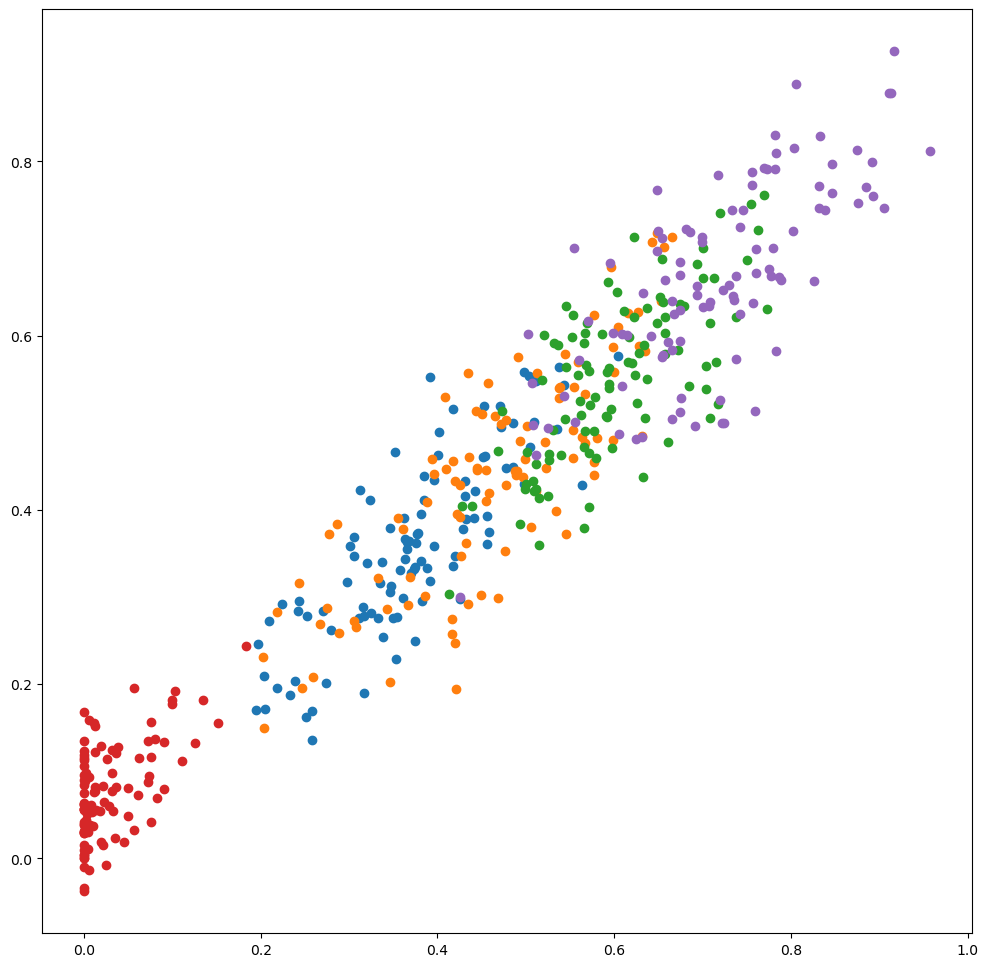

In [72]:
scale = 3
fig, axs = plt.subplots(1, 1, figsize=(4 * scale, 4 * scale))

for k in range(0, output_data.shape[0], 2):
    y = output_data[k, ...]
    y_targ = output_data[k+1, ...]

    cbar = axs.scatter(y_targ, y)